In [1]:
print("Hello world, this is B and E-tree 💛")


Hello world, this is B and E-tree 💛


In [1]:
import json

# Load watch-history.json
with open('../watch-history.json', encoding='utf-8') as f:
    watch_history = json.load(f)

# Load search-history.json
with open('../search-history.json', encoding='utf-8') as f:
    search_history = json.load(f)

print(f"Loaded {len(watch_history)} watch entries and {len(search_history)} search entries!")


Loaded 28965 watch entries and 1423 search entries!


In [2]:
import pandas as pd

# Create a DataFrame from your watch history
watch_df = pd.DataFrame(watch_history)

# Show the first few entries to see what the structure looks like
watch_df.head(3)


,header,title,titleUrl,subtitles,time,products,activityControls
0,YouTube,Watched Documenting the biggest failure in vid...,https://www.youtube.com/watch?v=fAoONciUM7M,"[{'name': 'Mujin', 'url': 'https://www.youtube...",2025-07-28T17:28:55.849Z,[YouTube],[YouTube watch history]
1,YouTube,Watched How to Destroy Your Extremely Successf...,https://www.youtube.com/watch?v=TAbFPZxmaGw,"[{'name': 'Mujin', 'url': 'https://www.youtube...",2025-07-28T16:48:21.714Z,[YouTube],[YouTube watch history]
2,YouTube,Watched How this DERANGED Vtuber became known ...,https://www.youtube.com/watch?v=qOt8x9eBM8Q,"[{'name': 'Mujin', 'url': 'https://www.youtube...",2025-07-28T16:15:36.087Z,[YouTube],[YouTube watch history]


In [3]:
# Filter entries where the product is YouTube Music
music_df = watch_df[watch_df['products'].astype(str).str.contains("YouTube Music")].copy()

# Show a preview of the filtered music data
music_df.head(5)


,header,title,titleUrl,subtitles,time,products,activityControls


In [4]:
# Lowercase titles and URLs for safer keyword matching
watch_df['title_lower'] = watch_df['title'].str.lower()
watch_df['url_lower'] = watch_df['titleUrl'].str.lower()

# Keywords that often signal music
music_keywords = ['official audio', 'lyrics', 'topic', 'official video', 'remix', 'cover']

# Match rows where title or URL contains any keyword
music_df = watch_df[watch_df['title_lower'].fillna('').str.contains('|'.join(music_keywords)) |
                    watch_df['url_lower'].fillna('').str.contains('|'.join(music_keywords))].copy()

# Preview
music_df.head(5)


,header,title,titleUrl,subtitles,time,products,activityControls,title_lower,url_lower
6,YouTube Music,Watched Sean Paul - She Doesn't Mind (Jesse Bl...,https://music.youtube.com/watch?v=ghK8FuP4mB4,"[{'name': 'Jesse Bloch', 'url': 'https://www.y...",2025-07-28T15:45:31.544Z,[YouTube],[YouTube watch history],watched sean paul - she doesn't mind (jesse bl...,https://music.youtube.com/watch?v=ghk8fup4mb4
17,YouTube Music,"Watched Lady Gaga, Bruno Mars - Die With A Smi...",https://music.youtube.com/watch?v=bhzgi0g-EOc,"[{'name': 'Theomatica', 'url': 'https://www.yo...",2025-07-28T12:46:58.004Z,[YouTube],[YouTube watch history],"watched lady gaga, bruno mars - die with a smi...",https://music.youtube.com/watch?v=bhzgi0g-eoc
22,YouTube Music,Watched Teardrops (Rules Remix),https://music.youtube.com/watch?v=z4TZuig4DeY,"[{'name': 'Womack & Womack - Topic', 'url': 'h...",2025-07-28T12:32:28.843Z,[YouTube],[YouTube watch history],watched teardrops (rules remix),https://music.youtube.com/watch?v=z4tzuig4dey
25,YouTube Music,Watched Say My Name (Remix),https://music.youtube.com/watch?v=gcA2ivj8Bgg,"[{'name': 'Morgan Seatree - Topic', 'url': 'ht...",2025-07-28T12:24:10.137Z,[YouTube],[YouTube watch history],watched say my name (remix),https://music.youtube.com/watch?v=gca2ivj8bgg
27,YouTube Music,Watched Ameno (Hard Techno Remix),https://music.youtube.com/watch?v=C2XAD0pMnsI,"[{'name': 'Jayron - Topic', 'url': 'https://ww...",2025-07-28T12:14:26.028Z,[YouTube],[YouTube watch history],watched ameno (hard techno remix),https://music.youtube.com/watch?v=c2xad0pmnsi


In [5]:
top_songs = music_df['title'].value_counts().head(10)
top_songs


title
Watched Woops (Dimitri Vegas & Junkie Kid Remix)           16
Watched Born This Way (Jost & Naaf Remix)                  14
Watched Big Ed Claps Back And I May Never Recover          10
Watched Lady Gaga ♥ Fooled Me Again, Honest Eyes LYRICS    10
Watched Beethoven - Fur Elise (Komuz Remix)                 9
Watched Heads Will Roll (A-Trak Remix Radio Edit)           8
Watched Gravity Falls Theme Song (OVA Dubstep Remix)        7
Watched Say My Name (Remix)                                 7
Watched Big Ed Is Covered In Mayo And On The Prowl          6
Watched Berq - Rote Flaggen (Official Video)                6
Name: count, dtype: int64

In [6]:
import ast

# Safely convert string to dictionary (if it's stored as a string)
def extract_artist(sub):
    try:
        if isinstance(sub, list):
            return sub[0]['name']
        elif isinstance(sub, str):
            sub_list = ast.literal_eval(sub)
            return sub_list[0]['name'] if sub_list else None
    except:
        return None

music_df['artist'] = music_df['subtitles'].apply(extract_artist)
top_artists = music_df['artist'].value_counts().head(10)
top_artists


artist
LadyGagaVEVO               28
Lady Gaga - Topic          22
CinnamonToastKen           17
Bountyhunter - Topic       16
XoAmalia                   14
SARA’H                     14
Jill                       10
Komuz - Topic               9
Jasmine Thompson            8
Yeah Yeah Yeahs - Topic     8
Name: count, dtype: int64

In [8]:
# Convert with error handling
music_df['time'] = pd.to_datetime(music_df['time'], errors='coerce')


C:\Users\emmap\AppData\Local\Temp\ipykernel_19584\2367506916.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = music_df['time'].dt.to_period('M').value_counts().sort_index()
C:\Users\emmap\AppData\Local\Temp\ipykernel_19584\2367506916.py:13: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\emmap\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


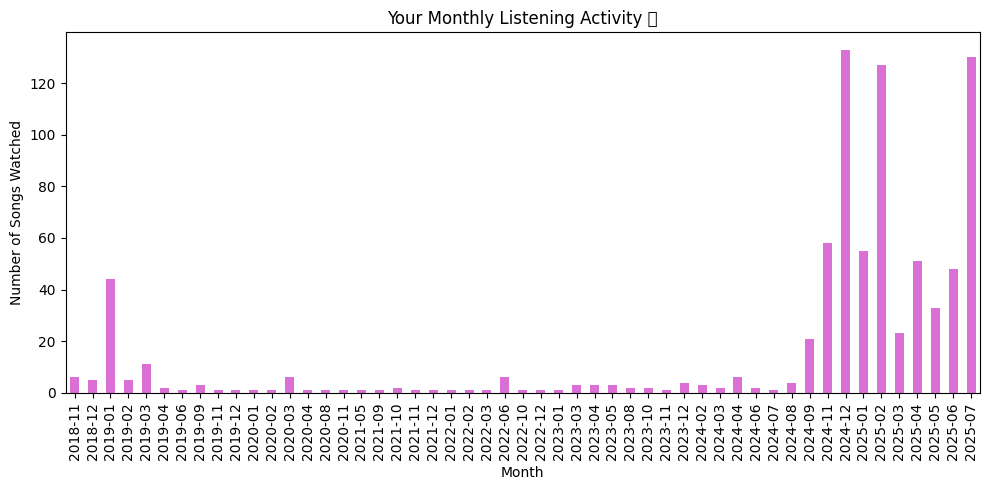

In [10]:
import matplotlib.pyplot as plt

# Make sure your time column is datetime
music_df['time'] = pd.to_datetime(music_df['time'], errors='coerce')

# Group by month
monthly_counts = music_df['time'].dt.to_period('M').value_counts().sort_index()

# Plot
monthly_counts.plot(kind='bar', figsize=(10, 5), color='orchid', title='Your Monthly Listening Activity 🎶')
plt.xlabel("Month")
plt.ylabel("Number of Songs Watched")
plt.tight_layout()
plt.show()


# 🎧 YouTube Music Wrapped 2025
An exploration of my YouTube music listening habits using my personal data export from Google Takeout.

## 📁 Dataset
- `watch-history.json`: All videos I watched
- `search-history.json`: All searches I made

## 🔍 What I Analyzed
- Monthly listening activity
- Peak listening periods
- Long gaps in usage

## 🧰 Tools Used
- Python
- Pandas
- Matplotlib

## 🧠 Summary of Insights
Will go here after the analysis!



In [18]:
music_df = df[df['title'].str.contains('official|lyrics|music|vevo|album|track|song', case=False, na=False)]
music_df.head()


,header,title,titleUrl,subtitles,time,products,activityControls
50,YouTube Music,"Watched Fast, Energetic Classical Music",https://music.youtube.com/watch?v=TZ5WW1kzepo,"[{'name': 'HALIDONMUSIC', 'url': 'https://www....",2025-07-28T08:03:04.651Z,[YouTube],[YouTube watch history]
111,YouTube Music,"Watched Fast, Energetic Classical Music",https://music.youtube.com/watch?v=TZ5WW1kzepo,"[{'name': 'HALIDONMUSIC', 'url': 'https://www....",2025-07-27T10:19:41.888Z,[YouTube],[YouTube watch history]
162,YouTube Music,"Watched Fast, Energetic Classical Music",https://music.youtube.com/watch?v=TZ5WW1kzepo,"[{'name': 'HALIDONMUSIC', 'url': 'https://www....",2025-07-26T19:07:54.764Z,[YouTube],[YouTube watch history]
186,YouTube Music,Watched Xtreme Audio (Official Thunderdome 202...,https://music.youtube.com/watch?v=rYbNECS7pu4,"[{'name': 'DJ Mad Dog - Topic', 'url': 'https:...",2025-07-26T16:02:23.685Z,[YouTube],[YouTube watch history]
342,YouTube Music,Watched HUNTR/X - How It's Done - Line Distrib...,https://music.youtube.com/watch?v=Ql3NYwIsoE4,"[{'name': 'K-Lines', 'url': 'https://www.youtu...",2025-07-24T18:08:30.384Z,[YouTube],[YouTube watch history]


In [19]:
import pandas as pd

# Load data into a DataFrame
df = pd.DataFrame(data)

# Convert 'time' to datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Drop any rows where conversion failed
df = df.dropna(subset=['time'])


In [20]:
# Add new columns
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour


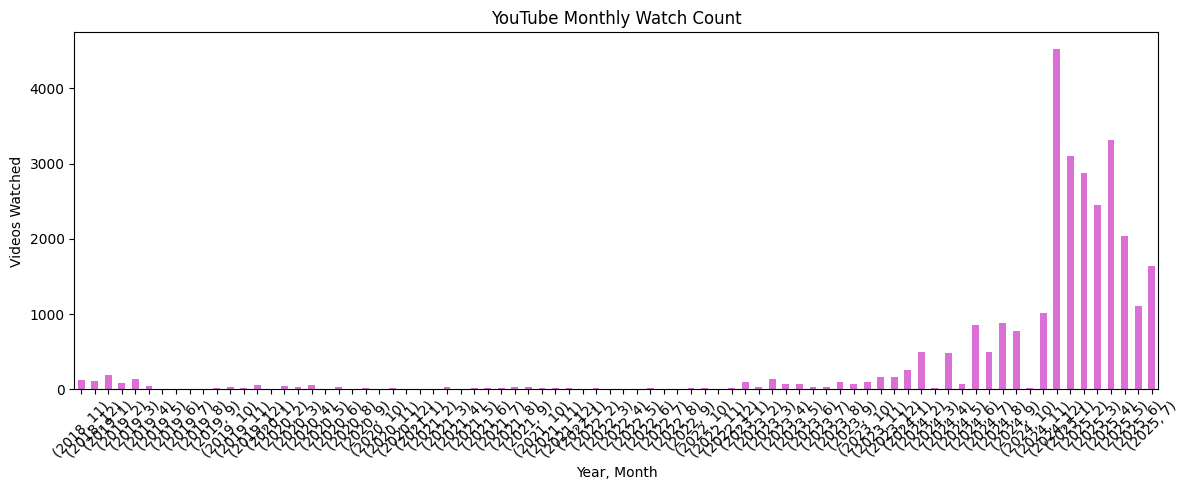

In [21]:
import matplotlib.pyplot as plt

# Group by month
monthly = df.groupby(['year', 'month']).size()

# Plot
monthly.plot(kind='bar', figsize=(12, 5), color='orchid')
plt.title("YouTube Monthly Watch Count")
plt.xlabel("Year, Month")
plt.ylabel("Videos Watched")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
music_keywords = ['official', 'lyrics', 'song', 'track', 'remix', 'audio', 'music video']
df['is_music'] = df['title'].str.lower().apply(lambda x: any(kw in x for kw in music_keywords))
music_df = df[df['is_music']]


C:\Users\emmap\AppData\Local\Temp\ipykernel_19584\2214034791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_df['year'] = music_df['time'].dt.year
C:\Users\emmap\AppData\Local\Temp\ipykernel_19584\2214034791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_df['month'] = music_df['time'].dt.month
C:\Users\emmap\AppData\Local\Temp\ipykernel_19584\2214034791.py:10: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\emmap\AppData\Local

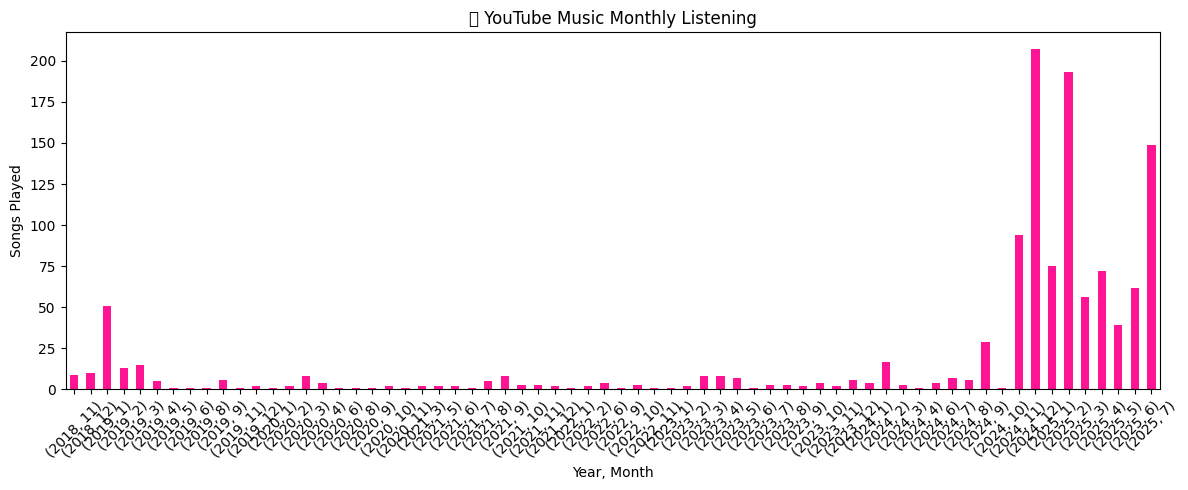

In [23]:
music_df['year'] = music_df['time'].dt.year
music_df['month'] = music_df['time'].dt.month
monthly_music = music_df.groupby(['year', 'month']).size()

monthly_music.plot(kind='bar', figsize=(12, 5), color='deeppink')
plt.title("🎵 YouTube Music Monthly Listening")
plt.xlabel("Year, Month")
plt.ylabel("Songs Played")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\emmap\AppData\Local\Temp\ipykernel_19584\2881380750.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_df['artist'] = music_df['subtitles'].apply(extract_channel_name)


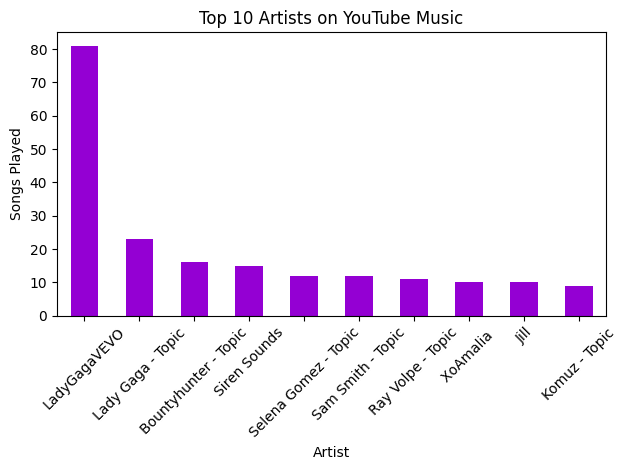

In [25]:
import re

def extract_channel_name(subtitles):
    if isinstance(subtitles, list) and subtitles:
        return subtitles[0].get('name', 'Unknown')
    return 'Unknown'

music_df['artist'] = music_df['subtitles'].apply(extract_channel_name)
top_artists = music_df['artist'].value_counts().head(10)

top_artists.plot(kind='bar', color='darkviolet')
plt.title("Top 10 Artists on YouTube Music")
plt.xlabel("Artist")
plt.ylabel("Songs Played")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\emmap\AppData\Local\Temp\ipykernel_19584\1237696008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_df['hour'] = music_df['time'].dt.hour
C:\Users\emmap\AppData\Local\Temp\ipykernel_19584\1237696008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_df['time_of_day'] = music_df['hour'].apply(lambda x: 'Night' if (x < 6 or x >= 18) else 'Day')


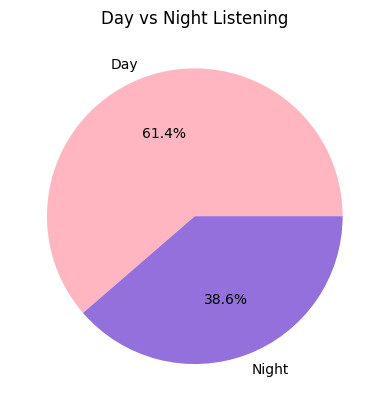

In [26]:
music_df['hour'] = music_df['time'].dt.hour
music_df['time_of_day'] = music_df['hour'].apply(lambda x: 'Night' if (x < 6 or x >= 18) else 'Day')

time_split = music_df['time_of_day'].value_counts()

time_split.plot(kind='pie', autopct='%1.1f%%', colors=['#FFB6C1', '#9370DB'])
plt.title("Day vs Night Listening")
plt.ylabel("")
plt.show()


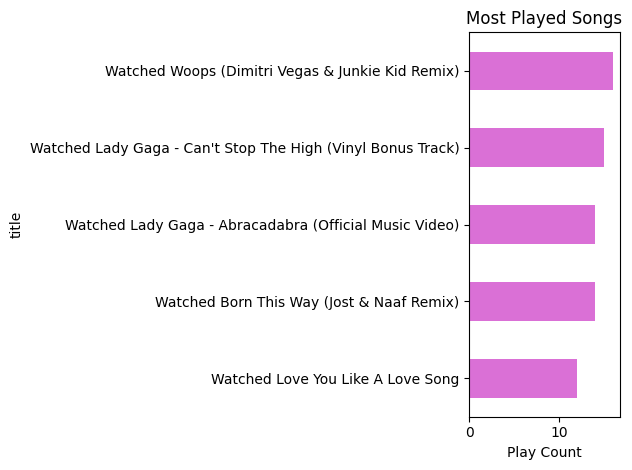

In [27]:
top_songs = music_df['title'].value_counts().head(5)
top_songs.plot(kind='barh', color='orchid')
plt.title("Most Played Songs")
plt.xlabel("Play Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 🎧 My YouTube Music Wrapped — In Python

This project is a personal data analysis of my YouTube Music watch history, inspired by Spotify Wrapped. I used Python, pandas, and matplotlib to visualize:

- My top artists
- Most played songs
- Monthly listening trends
- Day vs night listening behavior

## 🔧 Tools Used
- Python
- Jupyter Notebook
- pandas
- matplotlib

## 📊 Visual Highlights
![Top Artists](images/top_artists.png)
![Most Played Songs](images/most_played_songs.png)
![Day vs Night](images/day_vs_night.png)
![Monthly Trends](images/monthly_watch_trend.png)

## 🔐 Data
All data comes from my personal YouTube history export via Google Takeout. To protect privacy, the JSON file here is redacted or simulated.

## 🤘 Why I Made This
To learn real data analysis—and prove that music obsession can be quantified with code.

---

Made with love, coffee, and Lady Gaga. 💜
